In [1]:
import glob
import os


import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import transport


In [2]:
data_dir='/ocean/handres/glorys12/'
mask = xr.open_dataset(os.path.join(data_dir,'statics_subset_mask_bathy.nc'))
coords = xr.open_dataset(os.path.join(data_dir,'statics_subset_coordinates.nc'))

In [3]:
transects = pd.read_csv('../../data/sections_info.txt', delim_whitespace=True,
                       names=['Shortname', 'Longname', 'lon1', 'lat1', 'lon2', 'lat2', 'Dir-E', 'Dir-N'],
                       header=0)

In [5]:
year='[1,2][0-9][0-9][0-9]'
f = glob.glob(os.path.join(data_dir,f'*_{year}_daily_annmean.nc'))
dyear = xr.open_mfdataset(f)
dyear

<xarray.Dataset>
Dimensions:    (time: 27, bnds: 2, longitude: 721, latitude: 541, depth: 50)
Coordinates:
  * time       (time) datetime64[ns] 1993-07-02T12:00:00 ... 2019-07-02T12:00:00
  * longitude  (longitude) float32 -90.0 -89.92 -89.83 ... -30.17 -30.08 -30.0
  * latitude   (latitude) float32 35.0 35.08 35.17 35.25 ... 79.83 79.92 80.0
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    bottomT    (time, latitude, longitude) float32 dask.array<chunksize=(1, 541, 721), meta=np.ndarray>
    sithick    (time, latitude, longitude) float32 dask.array<chunksize=(1, 541, 721), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(1, 541, 721), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 541, 721), meta=np.ndarray>
    so         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 541, 721), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 541, 721), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float32 dask.array<chunksize=(1, 50, 541, 721), meta=np.ndarray>
Attributes: (12/29)
    CDI:                       Climate Data Interface version 2.0.3 (https://...
    Conventions:               CF-1.4
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    title:                     daily mean fields from Global Ocean Physics An...
    easting:                   longitude
    ...                        ...
    z_min:                     0.494025
    z_max:                     5727.917
    NCO:                       4.7.2
    nco_openmp_thread_number:  1
    frequency:                 year
    CDO:                       Climate Data Operators version 2.0.3 (https://...

In [6]:
transects

,Shortname,Longname,lon1,lat1,lon2,lat2,Dir-E,Dir-N
0,Ac,Anticosti,-64.800000,49.000000,-64.420000,49.900000,1,-1
1,BB_AZMP,BB-AZMP,-65.515182,43.542454,-65.414833,41.822609,-1,1
2,Bv,Bonavista,-53.070000,48.630000,-49.000000,50.000000,1,-1
3,BB,Bonne-Bay,-59.930000,50.590000,-57.990000,49.330000,-1,-1
4,CSI,CSI,-65.585000,43.469000,-66.008000,42.544000,-1,1
5,CS,Cabot-Strait,-60.620000,46.960000,-59.000000,47.800000,1,-1
6,Es,Estuary,-68.490000,48.300000,-68.750000,49.100000,1,1
7,FC,Flemish-Cap,-52.930000,47.000000,-43.000000,47.000000,-1,-1
8,Hfx,Halifax,-63.460000,44.700000,-61.400000,42.530000,-1,-1
9,Lb,Louisbourg,-59.850000,46.030000,-57.530000,43.470000,-1,-1


/tmp/ipykernel_24385/2265459373.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize=(12,5))


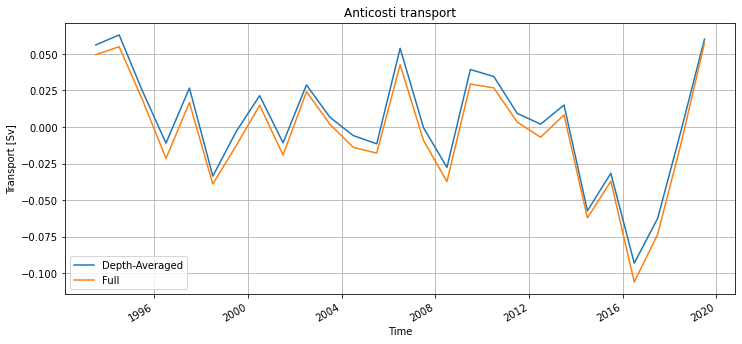

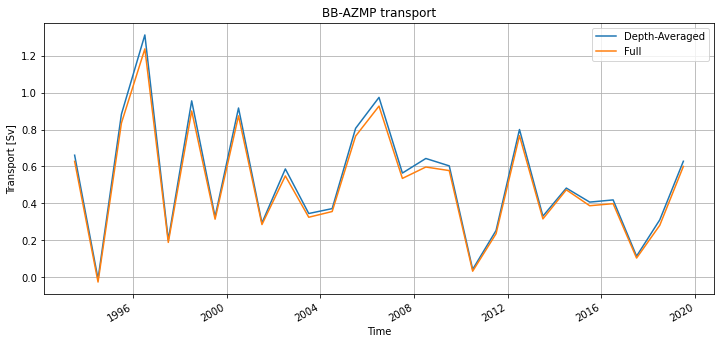

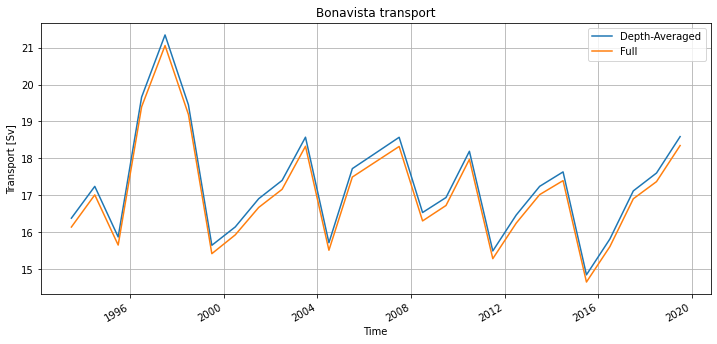

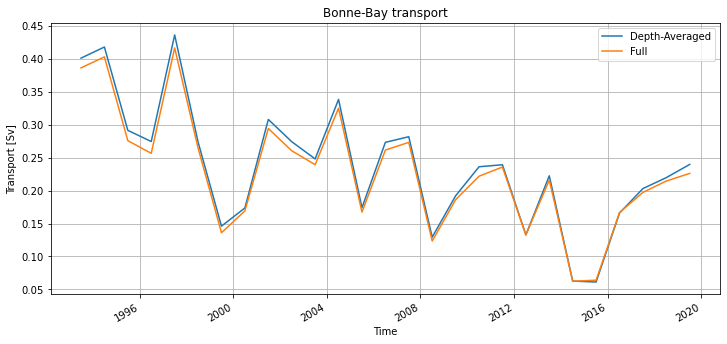

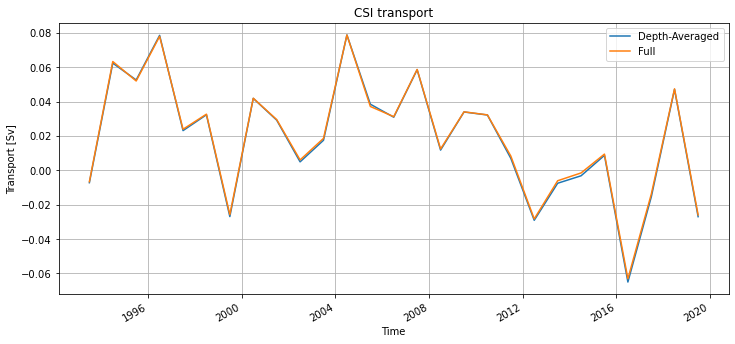

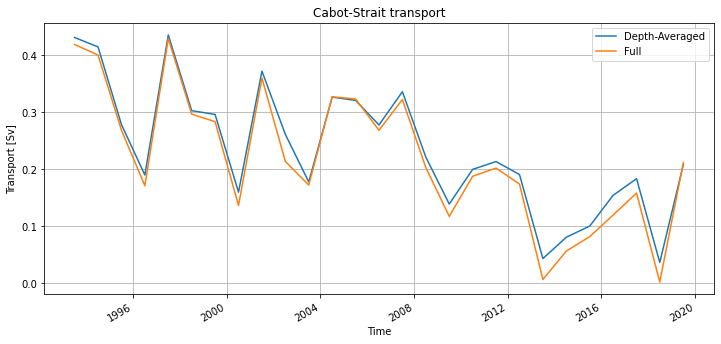

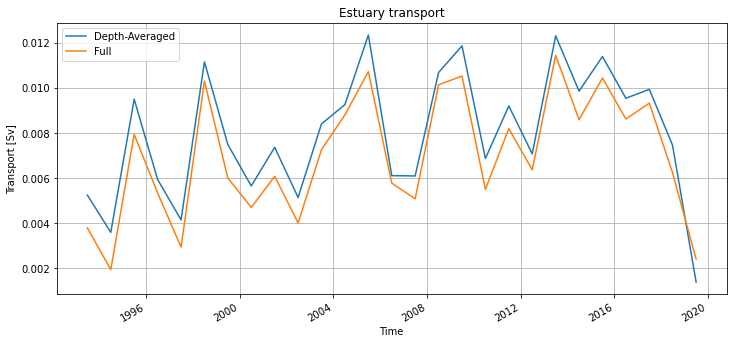

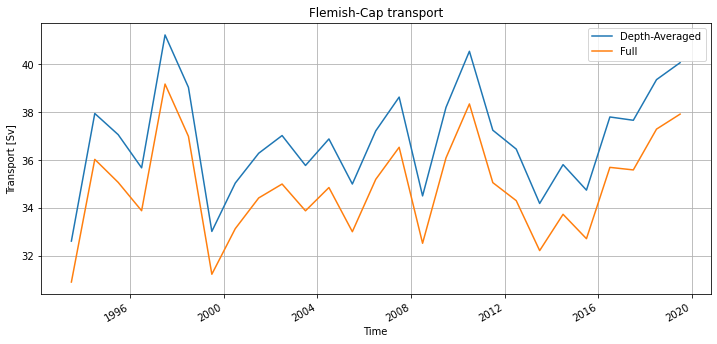

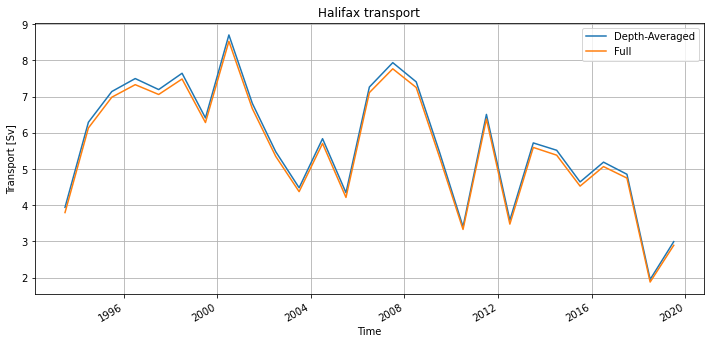

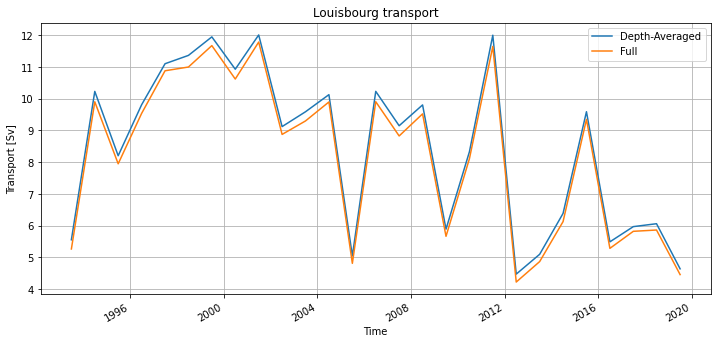

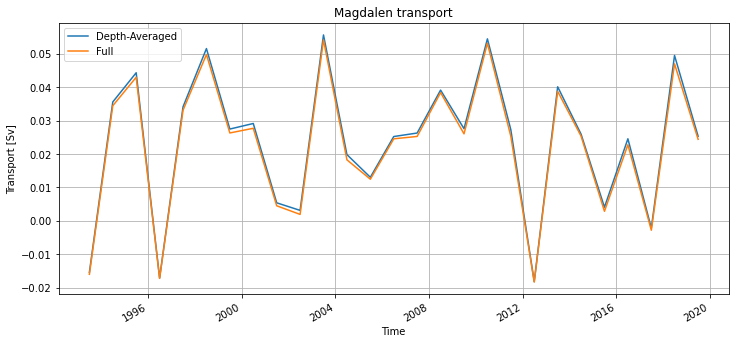

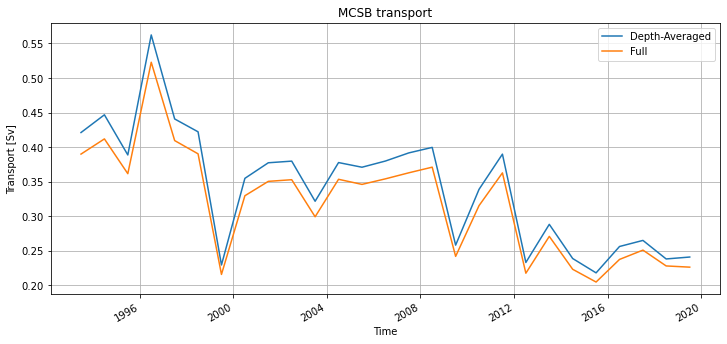

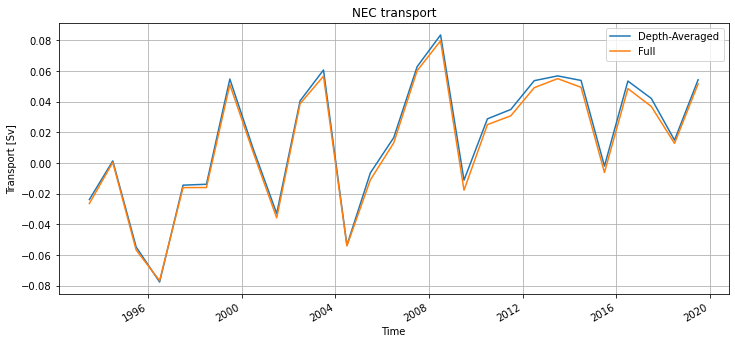

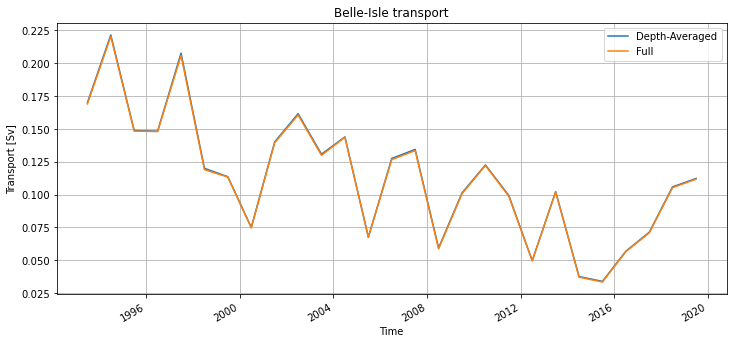

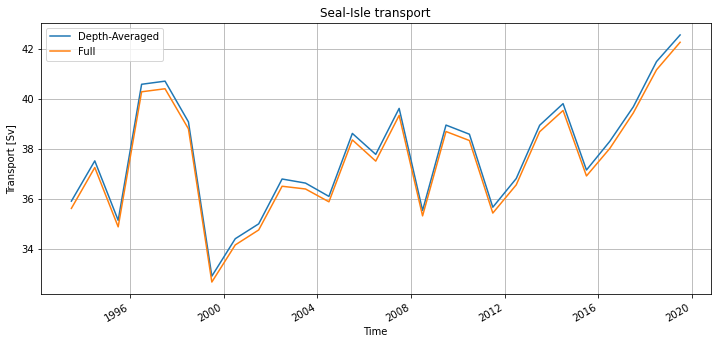

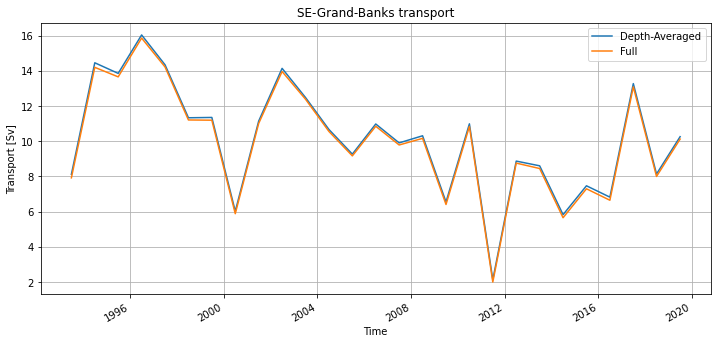

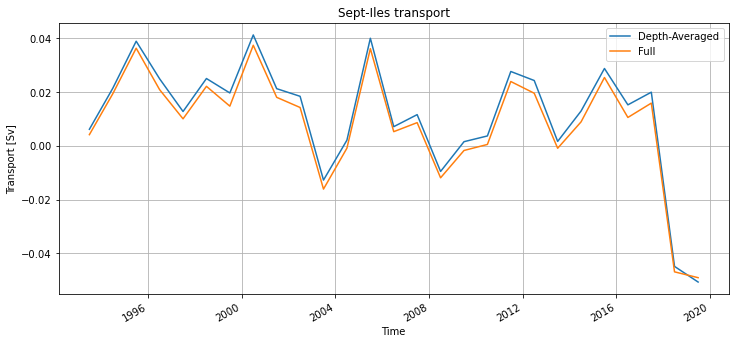

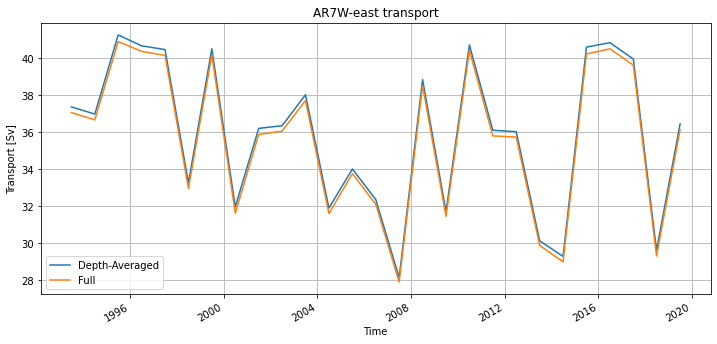

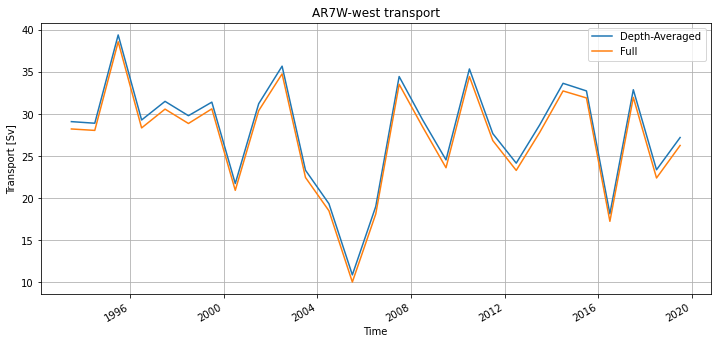

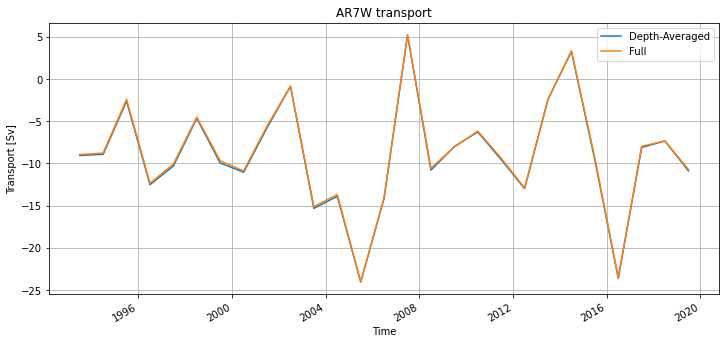

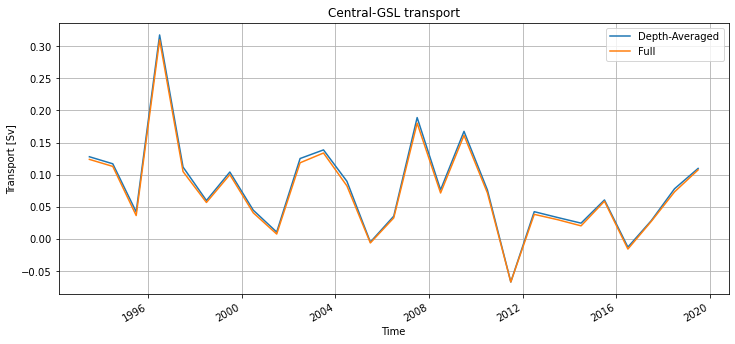

In [12]:
for name in transects['Longname']:
    transect = transects[transects['Longname'] == name]
    fig, ax = plt.subplots(1,1,figsize=(12,5))
    tbar, along_bar, across_bar = transport.get_transect_transport(
        dyear.uo, dyear.vo, 
        mask.mask, coords.e3t,
        transect
        )
    tfull, along, across = transport.get_transect_transport(
        dyear.uo, dyear.vo, 
        mask.mask, coords.e3t,
        transect, barotropic=False
        )
    (tbar/1e6).plot(ax=ax, label='Depth-Averaged')
    (tfull/1e6).plot(ax=ax, label='Full')
    ax.set_title(f'{name} transport')
    ax.set_ylabel('Transport [Sv]')
    ax.set_xlabel('Time')
    ax.grid()
    ax.legend()
